#Project cuối kì môn học Trực quan hóa dữ liệu
###Thông tin thành viên:
1. Nguyễn Thị Thu Hằng _ 18120027
2. Lê Nhựt Nam - 18120061
3. Nguyễn Viết Dùng _ 18120167
4. Phạm Thị Hoài Hiền _ 18120178
5. Võ Mạnh Hải _ 18120351


###Bối cảnh đề tài:
Đợt dịch lần thứ 4 tại Việt Nam đang diễn biến vô cùng phức tạp, nhiều thách thức với đa ổ dịch, đa nguồn lây và đa biến chủng. Trong hai tuần qua, số ca mắc mới trong nước tăng kỷ lục, lần đầu tiên ghi nhận biến thể Delta Plus của virus SARS-CoV-2 có khả năng lây nhiễm và nguy cơ tử vong cao hơn đang lây lan khắp toàn cầu, khiến các quốc gia trong đó có cả Việt Nam phải tăng cường cảnh giác, siết chặt các biện pháp phòng chống COVID-19. Thông qua các công cụ phân tích dữ liệu, chúng ta có thể sử dụng các công cụ để trực quan và phân tích dữ liệu. Từ đó có thể cung cấp một công cụ quản lí, kiểm soát tình hình dịch bệnh

#1. Tải dữ liệu

Dữ liệu của nhóm được lữu trữ trên github của nhóm 


In [2]:
!git clone https://github.com/NT-ThuHang/Data-Visualization

Cloning into 'Data-Visualization'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 67 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [3]:
# Tải tập tin data_covid19.csv chứa thông tin: tổng ca nhiễm (confirmed cases), tử vong (death cases), đang điều trị (active cases) theo ngày
# https://drive.google.com/file/d/1oq392ajjj1E47M5bdACwwUgOWFBA4hcF/view?usp=sharing
#!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1oq392ajjj1E47M5bdACwwUgOWFBA4hcF" -O Data-Covid19-VN.csv

# Tải tập tin Data-Covid19-VN.csv chứa thông tin chi tiết của các bệnh nhân
# https://drive.google.com/file/d/1ApnaUHxDDqaUHf1BysiD3CxFzYDaeDAL/view?usp=sharing
#!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1ApnaUHxDDqaUHf1BysiD3CxFzYDaeDAL" -O data_covid19.csv

# https://drive.google.com/file/d/1ZLoFJBjTUdGcjAgXXec27huvo-VBzoB-/view?usp=sharing
#!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1ZLoFJBjTUdGcjAgXXec27huvo-VBzoB-" -O Vietnam_province.csv

In [4]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     \ 133.1 MB 2.3 MB/s
     |████████████████████████████████| 6.6 MB 8.2 MB/s 
     |████████████████████████████████| 219 kB 63.4 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759596 sha256=0a241dca8de03d8cc03814c3ebfc2da74cd7e1a7ad0a6f68dfda7dd7ce0100b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-bxt5cuhe/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=38f228ba94b4bb0f5da7deab7bd4b945e7dff607f1b00b6812d9772ffb6ecdee
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built basemap pyshp


# 2. Import các thư viện

Các thư viện cơ sở: sys, os, datetime, random, time, math, io, itertools, base64, io

Các thư viện dùng cho xử lý bảng dữ liệu: Pandas

Các thư viện dùng cho xử lý số học: Numpy

Các thư viện dùng cho trực quan hóa dữ liệu: Matplotplib, Seaborn

In [5]:
# Import các thư viện
import sys
import os
from datetime import datetime
import random
import time
from math import sqrt
import itertools
import io
import base64

# Numerical processing
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import collections

# Sklearn
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
import seaborn as sns
import IPython
from IPython.display import display
from IPython.display import HTML
import matplotlib.dates as mdates
import plotly.express as px
from plotly.subplots import make_subplots

# Visualization Configurations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from pprint import pprint

#3. Đọc và tiền xử lý dữ liệu

##3.1. Đọc dữ liệu

In [6]:
# Đặt các biến chứa các đường dẫn (Trên môi trường Google Colab)
DATA_COVID19_CSV = '/content/Data-Visualization/PROJECT_CUOIKI/Data_Covid19_Daily.csv'

PATIENT_DATA_CSV = '/content/Data-Visualization/PROJECT_CUOIKI/Data_Covid19_Benh_Nhan.csv'

VIETNAM_RPOVINCE_INFO_CSV = '/content/Data-Visualization/PROJECT_CUOIKI/Vietnam_province.csv'

In [7]:
# Đọc dữ liệu
data_covid19_df = pd.read_csv(DATA_COVID19_CSV)
patient_data_df = pd.read_csv(PATIENT_DATA_CSV, engine='python', names=['patient_id', 'age', 'province_name', 'status', 'nationality'])

## 3.2. Thông tin về dữ liệu

Tập tin Data_Covid19_Daily.csv chứa thông tin: tổng ca nhiễm (confirmed cases), tổng ca tử vong (death cases), tổng ca đã đã phục hồi (recover cases), số ca mắc mới (new cases) theo ngày. Dữ liệu này được thu thập kể từ lúc bùng phát dịch tại Việt Nam 22/01/2020 đến ngày dữ liệu được thu thập là 12/07/2021. Bao quát số liệu cả 4 đợt dịch tại Việt Nam.

In [8]:
data_covid19_df.head()

,Ngày,Tổng số ca mắc,Tổng số ca tử vong,Tổng số ca phục hồi,Số ca mắc mới hàng ngày
0,1/22/2020,0,0,0,0
1,1/23/2020,2,0,0,2
2,1/24/2020,2,0,0,0
3,1/25/2020,2,0,0,0
4,1/26/2020,2,0,0,0


In [9]:
covid19_df = data_covid19_df
covid19_df.rename(columns={'Ngày': 'Date', 'Tổng số ca mắc': 'Confirmed_Cases', 'Tổng số ca tử vong': 'Death_Cases', 'Tổng số ca phục hồi': 'Recover_Cases', 'Số ca mắc mới hàng ngày': 'New_Confirmed_Daily'}, inplace=True)
covid19_df.Date = pd.to_datetime(covid19_df.Date)
covid19_df = covid19_df.set_index('Date')
covid19_df.head()

,Confirmed_Cases,Death_Cases,Recover_Cases,New_Confirmed_Daily
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,2,0,0,2
2020-01-24,2,0,0,0
2020-01-25,2,0,0,0
2020-01-26,2,0,0,0


Tập tin Data_Covid19_Benh_Nhan.csv chứa thông tin chi tiết của các bệnh nhân về ID Bệnh nhân, Độ tuổi, Nơi phát hiện bệnh, Tình trạng điều trị, và Quốc tịch của bênh nhân. Data chi tiết được thu thập từ 23/01/2020-12/07/2021. 

In [10]:
patient_data_df.head()

,patient_id,age,province_name,status,nationality
0,BN23628,42,Đồng Tháp,Đang điều trị,Việt Nam
1,BN23623,34,Đồng Tháp,Đang điều trị,Việt Nam
2,BN23612,10,Đồng Tháp,Đang điều trị,Việt Nam
3,BN23611,22,Đồng Tháp,Đang điều trị,Việt Nam
4,BN23592,30,Đồng Tháp,Đang điều trị,Việt Nam


Tập dữ liệu về bản đồ

In [11]:
vietnam_province_df = pd.read_csv(VIETNAM_RPOVINCE_INFO_CSV, skiprows=[0], engine='python', names=['Province', 'Region_Code', 'Country/Region', 'Lat', 'Long'])
vietnam_province_df.head()

,Province,Region_Code,Country/Region,Lat,Long
0,An Giang,VN-44,Vietnam,10.5216,105.1259
1,Bà Rịa - Vũng Tàu,VN-43,Vietnam,10.4963,107.1684
2,Bắc Giang,VN-54,Vietnam,21.2670,106.2000
3,Bắc Kạn,VN-53,Vietnam,22.1333,105.8333
4,Bạc Liêu,VN-55,Vietnam,9.2804,105.7200


##3.3. Thao tác và rút trích thông tin



###3.3.1. Rút trích thông tin theo nhóm tuổi

In [12]:
def identify_group_age(age):
  '''
  Hàm xác định nhóm tuổi
  Đầu vào: age, kiểu dữ liệu số nguyên
  Đầu ra: chuỗi, là nhóm tuổi cho tuổi đầu vào
  '''
  return (((((((((('Error', '0-9')[0 <= age < 10]
      ,'10-19')[10 <= age < 20]
      ,'20-29')[20 <= age < 30]
      ,'30-39')[30 <= age < 40]
      ,'40-49')[40 <= age < 50]
      ,'50-59')[50 <= age < 60]
      ,'60-69')[60 <= age < 70]
      ,'70-79')[70 <= age < 80]
      ,'80-89')[80 <= age < 90]
      ,'90+')[age >= 90]

In [13]:
patient_data_df['type'] = patient_data_df.nationality.apply(lambda x: (0, 1)[x == 'Việt Nam'])
patient_data_df['group_age'] = patient_data_df.age.apply(lambda x: identify_group_age(x))
patient_data_df.head()

,patient_id,age,province_name,status,nationality,type,group_age
0,BN23628,42,Đồng Tháp,Đang điều trị,Việt Nam,1,40-49
1,BN23623,34,Đồng Tháp,Đang điều trị,Việt Nam,1,30-39
2,BN23612,10,Đồng Tháp,Đang điều trị,Việt Nam,1,10-19
3,BN23611,22,Đồng Tháp,Đang điều trị,Việt Nam,1,20-29
4,BN23592,30,Đồng Tháp,Đang điều trị,Việt Nam,1,30-39


###3.3.2. Rút trích các dataframe bệnh nhân theo tình trạng điều trị


In [14]:
# Rút trích các dataframe bệnh nhân theo tình trạng điều trị
patient_data_df_active = patient_data_df[patient_data_df.status == 'Đang điều trị']
patient_data_df_recover = patient_data_df[patient_data_df.status == 'Khỏi']
patient_data_df_death = patient_data_df[patient_data_df.status == 'Tử vong']
patient_data_df_other = patient_data_df[patient_data_df.status == 'Khác']
# group_ages = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

###3.3.3. Rút trích các dataframe bệnh nhân theo tình trạng điều trị và theo độ tuổi

In [15]:
counter = collections.Counter(patient_data_df_active.group_age)
df_active_by_age = pd.DataFrame(list(counter.items()),columns = ['Group_Age','Confirmed_Cases'])
df_active_by_age = df_active_by_age.sort_values('Confirmed_Cases', ascending = False).set_index('Group_Age')
df_active_by_age

,Confirmed_Cases
Group_Age,
20-29,5405
30-39,5311
40-49,3223
50-59,2018
10-19,2007
0-9,1342
60-69,1043
70-79,307
90+,223


In [16]:
counter = collections.Counter(patient_data_df_recover.group_age)
df_recover_by_age = pd.DataFrame(list(counter.items()),columns = ['Group_Age','Recover_Cases'])
df_recover_by_age = df_recover_by_age.sort_values('Recover_Cases', ascending = False).set_index('Group_Age')
df_recover_by_age

,Recover_Cases
Group_Age,
20-29,2824
30-39,2433
40-49,959
10-19,618
50-59,590
0-9,427
60-69,312
70-79,94
80-89,33


In [17]:
counter = collections.Counter(patient_data_df_death.group_age)
df_death_by_age = pd.DataFrame(list(counter.items()),columns = ['Group_Age','Death_Cases'])
df_death_by_age = df_death_by_age.sort_values('Death_Cases', ascending = False).set_index('Group_Age')
df_death_by_age

,Death_Cases
Group_Age,
60-69,39
80-89,18
70-79,16
50-59,16
30-39,7
90+,4
40-49,3
20-29,2


In [18]:
counter = collections.Counter(patient_data_df_other.group_age)
df_other_by_age = pd.DataFrame(list(counter.items()),columns = ['Group_Age','Other_Cases'])
df_other_by_age = df_other_by_age.sort_values('Other_Cases', ascending = False).set_index('Group_Age')
df_other_by_age

,Other_Cases
Group_Age,
50-59,2
60-69,2


In [19]:
from functools import reduce
dataframes = [df_active_by_age, df_recover_by_age, df_death_by_age, df_other_by_age]
df_merged = reduce(lambda left,right: pd.merge(left,right,on=['Group_Age'],
                                            how='outer'), dataframes)
df_merged = df_merged.fillna(0).reset_index()
df_merged

,Group_Age,Confirmed_Cases,Recover_Cases,Death_Cases,Other_Cases
0,20-29,5405,2824,2.0,0.0
1,30-39,5311,2433,7.0,0.0
2,40-49,3223,959,3.0,0.0
3,50-59,2018,590,16.0,2.0
4,10-19,2007,618,0.0,0.0
5,0-9,1342,427,0.0,0.0
6,60-69,1043,312,39.0,2.0
7,70-79,307,94,16.0,0.0
8,90+,223,8,4.0,0.0
9,80-89,120,33,18.0,0.0


###3.3.4. Rút trích tình trạng bệnh nhân theo tỉnh thành

In [20]:
counter = collections.Counter(patient_data_df_active.province_name)
df_active_province = pd.DataFrame(list(counter.items()),columns = ['Province','Confirmed_Cases'])
df_active_province= df_active_province.sort_values('Confirmed_Cases', ascending = False).set_index('Province')


counter = collections.Counter(patient_data_df_recover.province_name)
df_recover_province = pd.DataFrame(list(counter.items()),columns = ['Province','Recover_Cases'])
df_recover_province = df_recover_province.sort_values('Recover_Cases', ascending = False).set_index('Province')


counter = collections.Counter(patient_data_df_death.province_name)
df_death_province = pd.DataFrame(list(counter.items()),columns = ['Province','Death_Cases'])
df_death_province = df_death_province.sort_values('Death_Cases', ascending = False).set_index('Province')


counter = collections.Counter(patient_data_df_other.province_name)
df_other_province = pd.DataFrame(list(counter.items()),columns = ['Province','Other_Cases'])
df_other_province= df_other_province.sort_values('Other_Cases', ascending = False).set_index('Province')


dataframes = [df_active_province, df_recover_province, df_death_province, df_other_province]
df_province_merged = reduce(lambda left,right: pd.merge(left,right,on=['Province'],
                                            how='outer'), dataframes)
df_province_merged = df_province_merged.reset_index()
df_province_merged['Province'].replace(np.nan, 'No info',inplace=True)
df_province_merged = df_province_merged.fillna(0).reset_index()
del df_province_merged['index']
df_province_merged

,Province,Confirmed_Cases,Recover_Cases,Death_Cases,Other_Cases
0,Hồ Chí Minh,12492.0,629.0,21.0,0.0
1,Bắc Giang,2467.0,3359.0,8.0,0.0
2,Bình Dương,1281.0,45.0,0.0,0.0
3,Bắc Ninh,659.0,1012.0,9.0,0.0
4,Đồng Tháp,559.0,27.0,4.0,0.0
...,...,...,...,...,...
57,Sơn La,1.0,0.0,0.0,0.0
58,Yên Bái,0.0,5.0,0.0,0.0
59,No info,0.0,2.0,0.0,0.0
60,Tuyên Quang,0.0,1.0,0.0,0.0


In [21]:
df_province_merged_position = reduce(lambda left,right: pd.merge(left,right,on=['Province'],
                                            how='outer'), [df_province_merged, vietnam_province_df])
df_province_merged_position = df_province_merged_position.fillna(0)
df_province_merged_position

,Province,Confirmed_Cases,Recover_Cases,Death_Cases,Other_Cases,Region_Code,Country/Region,Lat,Long
0,Hồ Chí Minh,12492.0,629.0,21.0,0.0,VN-SG,Vietnam,10.7800,106.6950
1,Bắc Giang,2467.0,3359.0,8.0,0.0,VN-54,Vietnam,21.2670,106.2000
2,Bình Dương,1281.0,45.0,0.0,0.0,VN-57,Vietnam,11.3254,106.4770
3,Bắc Ninh,659.0,1012.0,9.0,0.0,VN-56,Vietnam,21.1861,106.0763
4,Đồng Tháp,559.0,27.0,4.0,0.0,VN-45,Vietnam,10.4938,105.0191
...,...,...,...,...,...,...,...,...,...
62,Cao Bằng,0.0,0.0,0.0,0.0,VN-04,Vietnam,22.6640,106.2680
63,Hòa Bình,0.0,0.0,0.0,0.0,VN-14,Vietnam,20.8137,105.3383
64,Kon Tum,0.0,0.0,0.0,0.0,VN-28,Vietnam,14.3838,107.9833
65,Thanh Hoá,0.0,0.0,0.0,0.0,VN-21,Vietnam,19.8200,105.8000


###3.3.5. Rút trích thông tin về quốc tịch

In [22]:
# Rút trích thông tin cho bảng travel_country 
travel_country = patient_data_df['nationality'].dropna().tolist()
travel_countries = []
for country in travel_country:
  name = country.split(', ')
  travel_countries.extend(name)
counter = collections.Counter(travel_countries)
df_travel_country = pd.DataFrame(list(counter.items()),columns = ['Country','Number_of_Cases'])
df_travel_country = df_travel_country.sort_values('Number_of_Cases', ascending = False)
df_travel_country.head()
# Cột Country: Chứa trên quốc gia, dạng chuỗi
# Cột Number_of_Cases: Số trường hợp đi từ quốc gia đó trở về

,Country,Number_of_Cases
0,Việt Nam,29161
4,Ấn Độ,60
3,Nga,28
13,Vương quốc Anh,22
2,Trung Quốc,15


#4. Trực quan hóa dữ liệu

##4.1. Diễn biến tình hình dịch bệnh

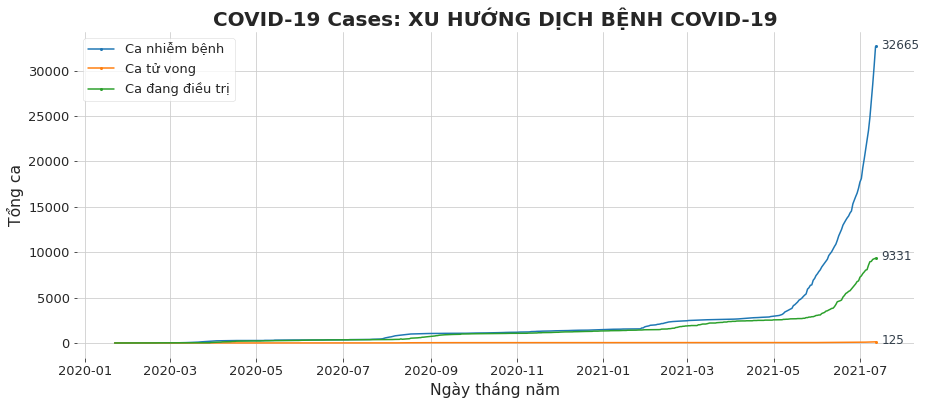

In [23]:
def graph_cases():
    ''' These are the "Tableau 20" colors as RGB.  '''
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    ''' Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts. '''
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    '''Initialization figure object'''
    # Update font size
    plt.rcParams.update({'font.size': 13})
    
    fig_obj = plt.figure(figsize=(15, 6))

    ''' Remove the plot frame lines. They are unnecessary chartjunk. '''
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    '''Set x, y label'''
    ax.set_ylabel('Tổng ca')
    ax.set_title('COVID-19 Cases: XU HƯỚNG DỊCH BỆNH COVID-19', loc='center', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel('Ngày tháng năm')
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.grid(True)
    # Plot line
    plt.plot(covid19_df.index, covid19_df['Confirmed_Cases'], '-o', markersize=2,
             color=tableau20[0], markevery=[-1], label='Ca nhiễm bệnh')
    plt.plot(covid19_df.index, covid19_df['Death_Cases'], '-o',
             markersize=2, color=tableau20[2], markevery=[-1], label='Ca tử vong')
    plt.plot(covid19_df.index, covid19_df['Recover_Cases'], '-o',
             markersize=2, color=tableau20[4], markevery=[-1], label='Ca đang điều trị')
    plt.legend(loc="upper left")
    # Add value at the end
    end_date = mdates.date2num(covid19_df.index[-1])
    case_value = []
    case_value.append(covid19_df['Confirmed_Cases'].iloc[-1])
    case_value.append(covid19_df['Death_Cases'].iloc[-1])
    case_value.append(covid19_df['Recover_Cases'].iloc[-1])
    for val in case_value:
        plt.annotate(int(val),
                     (end_date, val),
                     color='#333F4B', fontsize=12,
                     textcoords="offset points",
                     xytext=(6, -2),
                     ha='left')
    # Show graph
    plt.show()


graph_cases()

***Phân tích Biểu đồ Xu hướng bệnh covid19***
* Dựa vào biểu đồ thể hiện xu hướng bệnh Covid 19 ta có thể dễ dàng thấy được đây là đợt dịch có quy mô lớn nhất trong lịch sử Đại dịch Covid tại Việt Nam.
* Phân tích mô tả của dữ liệu tổng thể cho thấy các trường hợp được xác nhận COVID-19 mới hàng ngày và các trường hợp phục hồi đã tăng lên đáng kể sau ngày tháng 6, kể từ khi dịch bùng phát. Nó cho thấy một xu hướng tăng dần, cho thấy một dịch bệnh có thể chưa ổn định. Từ đầu dợt dich đến sau đó hơn 1 tháng, số trường hợp được xác nhận và phục hồi hầu như tăng cao. Tuy nhiên, đợt dịch thứ 4 là một trường hợp đặc biệt. Cụ thể:
* Qua các đợt dịch trước số lượng các ca nhiễm bệnh tăng nhưng rất ít thể hiện qua đường biểu đồ thoải ( gần như ngang). Tuy nhiên qua từng đợt dịch biểu đồ có xu hướng dốc dần, điều đó thể hiện dịch covid ngày càng khó kiểm soát, tỉ lệ lây lan tăng cao. 
* Một điểm đáng chú ý, giai đoạn đầu của các đợt dịch, biểu đồ có xu hướng dốc bất thường và sau đó (tầm 1 tháng sau khi bắt đầu đợt dịch) sẽ bình thường trở lại, điều đó cũng có thể dễ hiểu, sau thời gian phát hiện bệnh thì các chính sách của ban phòng chống dịch đã có hiệu quả kiểm soát giúp tình hình dịch dần ổn hơn. Tuy nhiên ở đợt dịch thứ 4 này (đã sau hơn 2 tháng) biểu đồ chưa có xu thể thoải đần mà đang trong giai đoạn tăng(rất dốc) thể hiện bệnh dịch còn đang trong giai đoạn phát triển, trường hợp nhiễm bệnh sẽ vẫn tăng cao trong những ngày tiếp theo. Dịch bênh đang nằm trong tầm khó kiểm soát hoàn toàn, các chính sách phòng chống dịch và ý thức người dân cần được nâng cao.

* Bên cạnh đó, đây là đợt dịch có số ca tử vong nhiều vượt trội hơn so với các đợt dịch trước, điều đó thể hiện dịch bệnh đang xuất hiện các biến chủng nguy hiểm.

* Không chỉ vậy chúng ta còn có thể sự chệnh lệch quá lớn giữa số lượng ca nhiễm bệnh và số lượng tổng ca được chữa khỏi, tổng ca tử vong thì một thực tế ta có thể thấy, nếu dịch bệnh vẫn tăng theo tốc độ này cộng với việc người không tuân thủ nghiêm theo các chủ trương phòng chống dịch của nhà nước thì việc quá tải ở các bệnh viện, cũng như dịch bệnh không nằm trong tầm kiểm soát nữa là rất có thể xảy ra.

##4.2. Ca nhiễm COVID-19 theo ngày

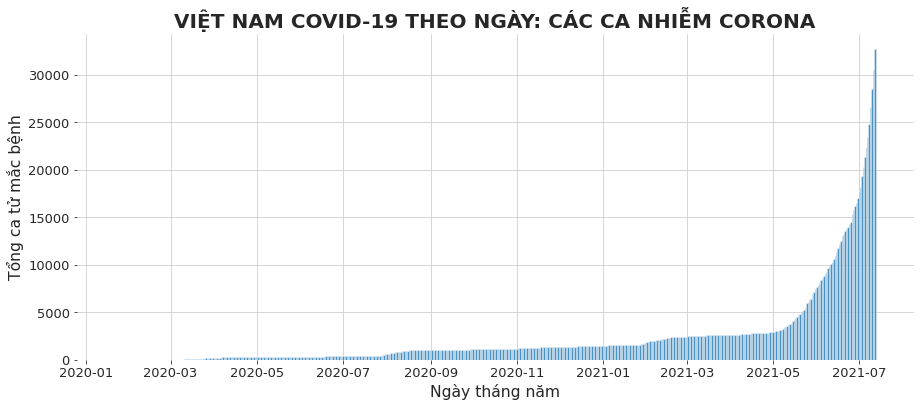

In [24]:
def daily_confirm_graph():
    ''' These are the "Tableau 20" colors as RGB.  '''
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    ''' Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts. '''
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    '''Initialization figure object'''
    # Update font size
    plt.rcParams.update({'font.size': 13})
    
    fig_obj = plt.figure(figsize=(15, 6))

    ''' Remove the plot frame lines. They are unnecessary chartjunk. '''
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    '''Set x, y label'''
    ax.set_ylabel('Tổng ca tử mắc bệnh')
    ax.set_title('VIỆT NAM COVID-19 THEO NGÀY: CÁC CA NHIỄM CORONA', loc='center', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel('Ngày tháng năm')
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    width = 1
    ax.bar(covid19_df.index, covid19_df['Confirmed_Cases'],
           width, color=tableau20[0], alpha=0.8)
    ax.grid(True)
    plt.show()
daily_confirm_graph()

***Phân tích Biểu đồ thể hiện tổng số các ca nhiễm Việt Nam theo ngày***
* Qua biểu đồ này chúng ta có thể thấy được sự tăng của các ca nhiễm theo ngày cụ thể qua từng đợt dịch
* Từ biểu đồ ta cũng có thể nhận thấy được một thực tế những đợt dịch trước đã được ta kiểm soát rất tốt, tuy nhiên đến đợt dịch thứ 4 này, đã sau 2 tháng bùng dịch nhưng vẫn chưa có dấu hiệu hạ nhiệt, số ca nhiễm hàng ngày vẫn tăng cao, chênh lệch giữa hai cột là rất lớn, so với các đợt dịch trước. Điều này cho thấy mức độ lây lan nhanh của bệnh dịch với nhiều biến chủng nguy hiểm. Bên cạnh đó cũng có thể có một số nguyên do khách quan khác như sự thờ ơ của người dân trong phòng chống dịch bệnh(xuất phát từ sự kiểm soát dịch quá thành công của ban chỉ đạo phòng dịch các đợt trước),...

##4.3. Ca tử vong COVID-19 theo ngày

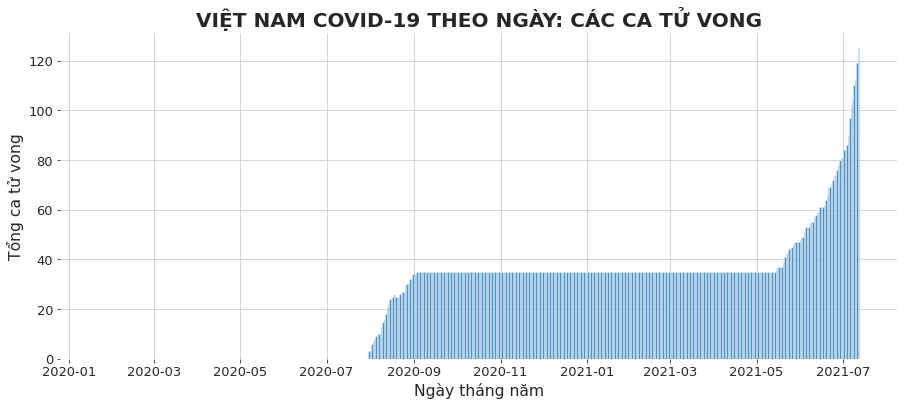

In [25]:
def daily_death_graph():
    ''' These are the "Tableau 20" colors as RGB.  '''
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    ''' Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts. '''
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    '''Initialization figure object'''
    # Update font size
    plt.rcParams.update({'font.size': 13})
    
    fig_obj = plt.figure(figsize=(15, 6))

    ''' Remove the plot frame lines. They are unnecessary chartjunk. '''
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    '''Set x, y label'''
    ax.set_ylabel('Tổng ca tử vong')
    ax.set_title('VIỆT NAM COVID-19 THEO NGÀY: CÁC CA TỬ VONG', loc='center', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel('Ngày tháng năm')
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    width = 1
    ax.bar(covid19_df.index, covid19_df['Death_Cases'],
           width, color=tableau20[0], alpha=0.8)
    ax.grid(True)
    plt.show()
daily_death_graph()

***Phân tích biểu đồ thể hiện tổng số ca tử vong theo ngày***
* Biểu đồ thể hiện tổng số ca tử vong của bệnh nhân kể từ khi bắt đầu dịch bệnh.
* Có thể thấy được trong đợt dịch đầu tiên và lần thứ 2, có xuất hiện rất ít các ca tử vong. Điều đó có thể diễn giải đơn giản vì là dịch mới nên y tế của nước ta chưa thể nào đối phó triệt để với dịch, hoặc theo thông tin báo đài những người bệnh đa số có bệnh nền đã rất năng nên dẫn tới tử vong. Tuy nhiên vào đợt dịch thứ 3, tình hình dịch bệnh đã được kiểm soát rất tốt, công tác chữa trị và kiểm soát dịch bệnh đã thực hiện được đảm bảo, nên số ca tử vong là không có.
* Đến đợt dịch thứ 4, số ca tử vong tăng vọt, dựa vào đây chứng ta có thể thấy được mức độ nguy hiểm của bệnh dịch, từ đó tự nâng cao nhận thức bản thân và có ý thức bảo vệ mình, bảo vệ cộng đồng.


##4.4. Ca đã được điều trị COVID-19 theo ngày

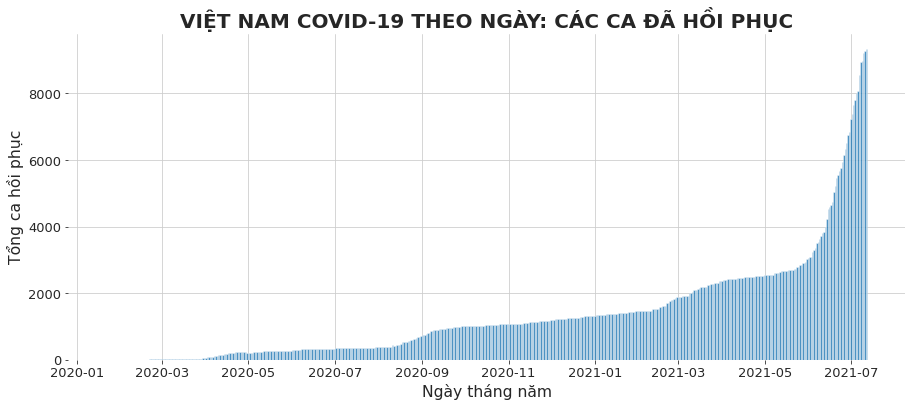

In [26]:
def daily_active_graph():
    ''' These are the "Tableau 20" colors as RGB.  '''
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    ''' Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts. '''
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    '''Initialization figure object'''
    # Update font size
    plt.rcParams.update({'font.size': 13})
    
    fig_obj = plt.figure(figsize=(15, 6))

    ''' Remove the plot frame lines. They are unnecessary chartjunk. '''
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    '''Set x, y label'''
    ax.set_ylabel('Tổng ca hồi phục')
    ax.set_title('VIỆT NAM COVID-19 THEO NGÀY: CÁC CA ĐÃ HỒI PHỤC', loc='center', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel('Ngày tháng năm')
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    width = 1
    ax.bar(covid19_df.index, covid19_df['Recover_Cases'],
           width, color=tableau20[0], alpha=0.8)
    ax.grid(True)
    plt.show()
daily_active_graph()

***Phân tích biểu đồ thể hiện tổng số ca đã hồi phục***
* Từ biểu đồ trên ta có thể dễ dàng thấy được, số người hồi phục ngày một tăng cao, nhưng sự tăng rất chậm. Thể hiện một điều bệnh có thể được điều trị nhưng với việc điều trị khỏi bệnh là một quá trình gian nan
* Chưa hết ta có thể thấy được số lượng người bệnh với số lượng người được phục hồi được là một con số chệnh lệnh rất cao, vì thể biều đồ này được sử dụng như một sự nhắc nhở cho người dân khi họ còn dửng dưng với sức khỏe và tính mạng của mình. 
* Một sự thật khác, với tình hình dịch đang rất căng thẳng như hiện này, sự tăng trung bình tầm 500-1000 ca nhiễm thì việc các bệnh viện có thể sẽ thất thủ và sự vỡ trận vì covid19 của người dân Ấn Độ sẽ là nhưng viễn cảnh có khả năng xảy ra cao với nước ta, nếu chúng ta còn không thức tỉnh và tuân thủ nghiêm ngặt các biện pháp phòng chống bệnh của Ban Chỉ Đạo Quốc Gia.


##4.5. Quốc tịch của các bệnh nhân COVID tại Việt Nam

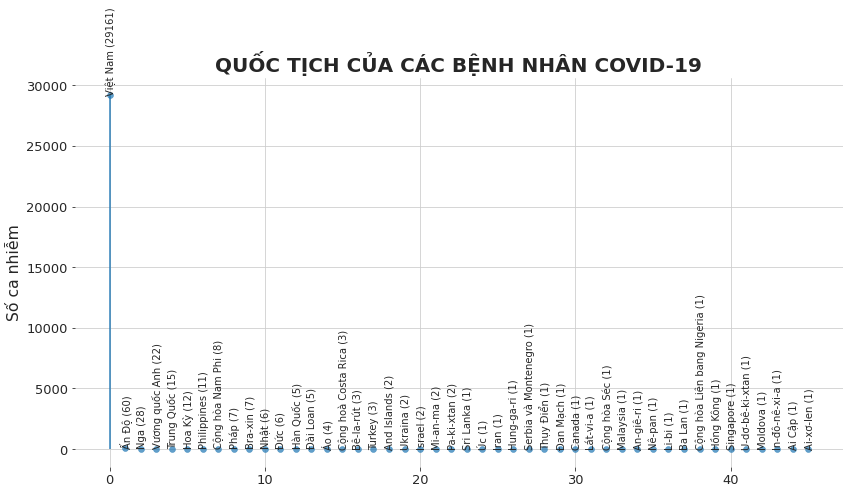

In [27]:
def nationality_graph(df_travel_country):
    ''' These are the "Tableau 20" colors as RGB.  '''
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    ''' Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts. '''
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    scaler = MinMaxScaler()

    cp_data = df_travel_country.copy()

    name = cp_data['Country'].tolist()

    size_ = len(
        cp_data['Number_of_Cases'].tolist())

    name_size = cp_data['Number_of_Cases'].tolist()
    x_pos = np.arange(0,size_)
    # Update font size
    plt.rcParams.update({'font.size': 13})
    
    '''Initialization figure object'''
    fig, ax = plt.subplots(figsize=(12, 8))

    ''' Remove the plot frame lines. They are unnecessary chartjunk. '''
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.vlines(x=x_pos, ymin=0, ymax=name_size,
              color=tableau20[0], alpha=0.7, linewidth=2)
    ax.scatter(x=x_pos, y=name_size, color=tableau20[0], alpha=0.7)
    ax.grid(True)

    '''Set x, y label'''
    ax.set_ylabel('Số ca nhiễm')
    ax.set_title(
        'QUỐC TỊCH CỦA CÁC BỆNH NHÂN COVID-19', loc='center', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    for i in range(0, len(x_pos)):
        ax.text(x_pos[i], name_size[i] + 2, s=f'{name[i]} ({name_size[i]})', wrap=True, rotation=90,
                fontsize=10, va='center_baseline')
    plt.gca().set_yscale('linear')
    plt.tight_layout()
    plt.show()


nationality_graph(df_travel_country)

***Phân tích quốc tịch của các bệnh nhân***
* Biểu đồ này mục đích để ta có thể quan sát được quốc tịch của các bệnh nhân, từ đó để có cơ sở phân tích nguồn lây lan bệnh dịch, một phần khác để có thể quản lí chặt chẽ vùng biên giới, ngăn chặn các trường hợp vượt biên và mang nguồn bệnh đến lây nhiễm trong cuộc đồng.


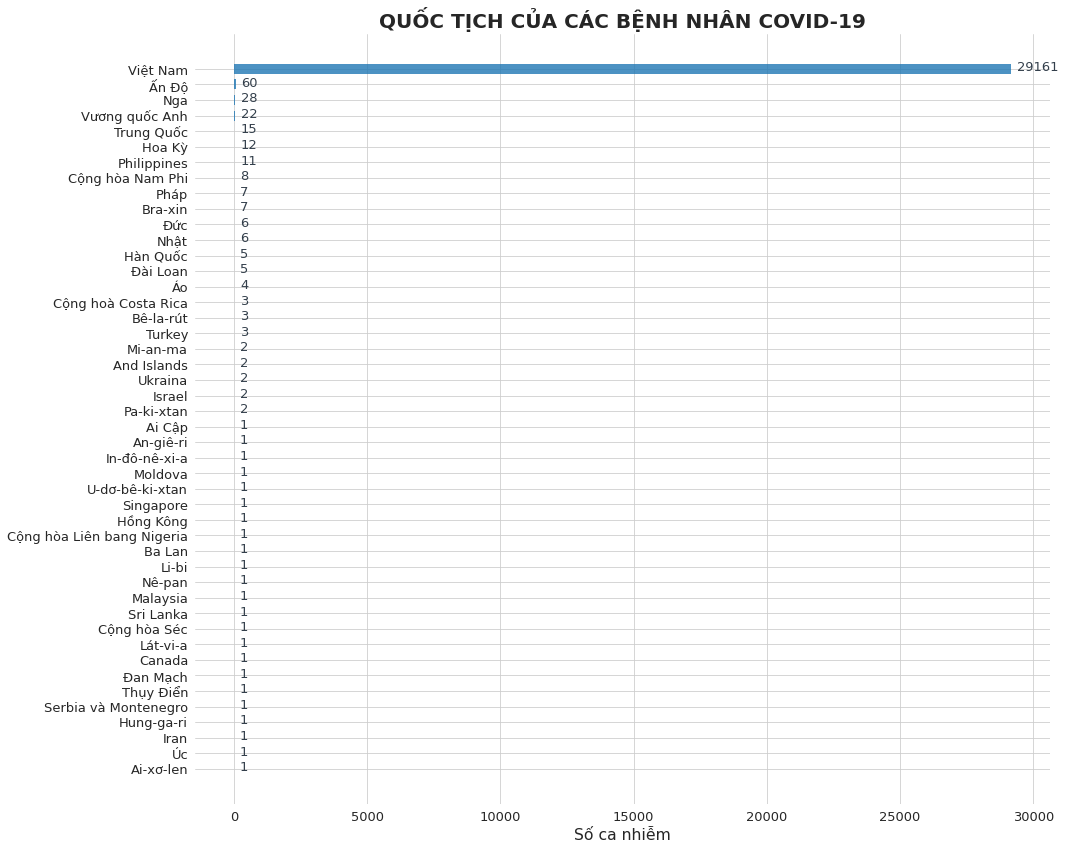

In [28]:
def bar_chart_graph(df_travel_country):
    ''' These are the "Tableau 20" colors as RGB.  '''
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    ''' Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts. '''
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    df = df_travel_country.sort_values(
        'Number_of_Cases', ascending=True).reset_index(drop=True).set_index('Country')

    # Update font size
    plt.rcParams.update({'font.size': 13})
    
    fig, ax = plt.subplots(figsize=(15, 12))

    ''' Remove the plot frame lines. They are unnecessary chartjunk. '''
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(True)

    # Plot
    plt.hlines(y=list(range(1, df.shape[0]+1)), xmin=0, xmax=df['Number_of_Cases'],
               color=tableau20[0], alpha=0.8, linewidth=10)

    # Set axis label and annotations
    ax.set_title(
        'QUỐC TỊCH CỦA CÁC BỆNH NHÂN COVID-19', loc='center', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    ax.set_xlabel('Số ca nhiễm')
    for x, y in zip(df['Number_of_Cases'], list(range(1, df.shape[0]+1))):
        plt.annotate(x,  # this is the text
                     (x, y),  # this is the point to label
                     color='#333F4B',
                     textcoords="offset points",  # how to position the text
                     xytext=(6, -2),  # distance from text to points (x,y)
                     ha='left')
    plt.yticks(list(range(1, df.shape[0]+1)), df.index)
    plt.tight_layout()
    plt.show()


bar_chart_graph(df_travel_country)

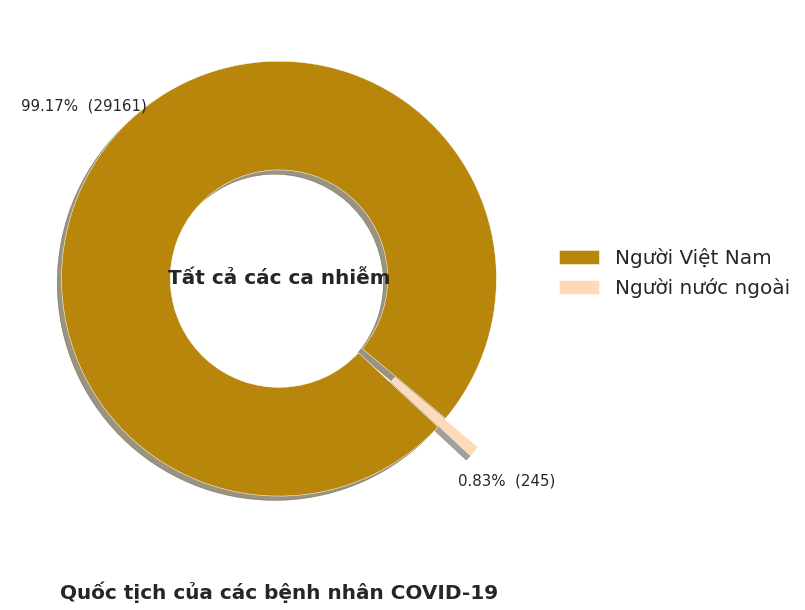

In [29]:
number_of_colors = 2
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)
nationality_list = list(patient_data_df['type'].value_counts())
labels = ["Người Việt Nam", "Người nước ngoài"]
explode= [0, 0.2]
# Update font size
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

wedges, texts, autotexts = ax.pie(nationality_list, 
                                  colors=colors,
                                  shadow=True,
                                  autopct=make_autopct(nationality_list), 
                                  wedgeprops=dict(width=0.5), 
                                  startangle=-40, 
                                  textprops={'fontsize': 15}, 
                                  pctdistance=1.2, 
                                  labeldistance=1.2, 
                                  explode=explode)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
ax.legend(labels,loc='lower left', bbox_to_anchor= (1., 0.45), ncol=1,
            borderaxespad=0, frameon=False, prop={'size': 20})
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, "Tất cả các ca nhiễm", ha='center', **kwargs)
plt.title('Quốc tịch của các bệnh nhân COVID-19', y=-0.1, fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

***Phân tích biểu đồ về tình trạng tuổi tác của bệnh nhân***

##4.6. Người bệnh nước ngoài và Việt Nam theo độ tuổi

74
2021


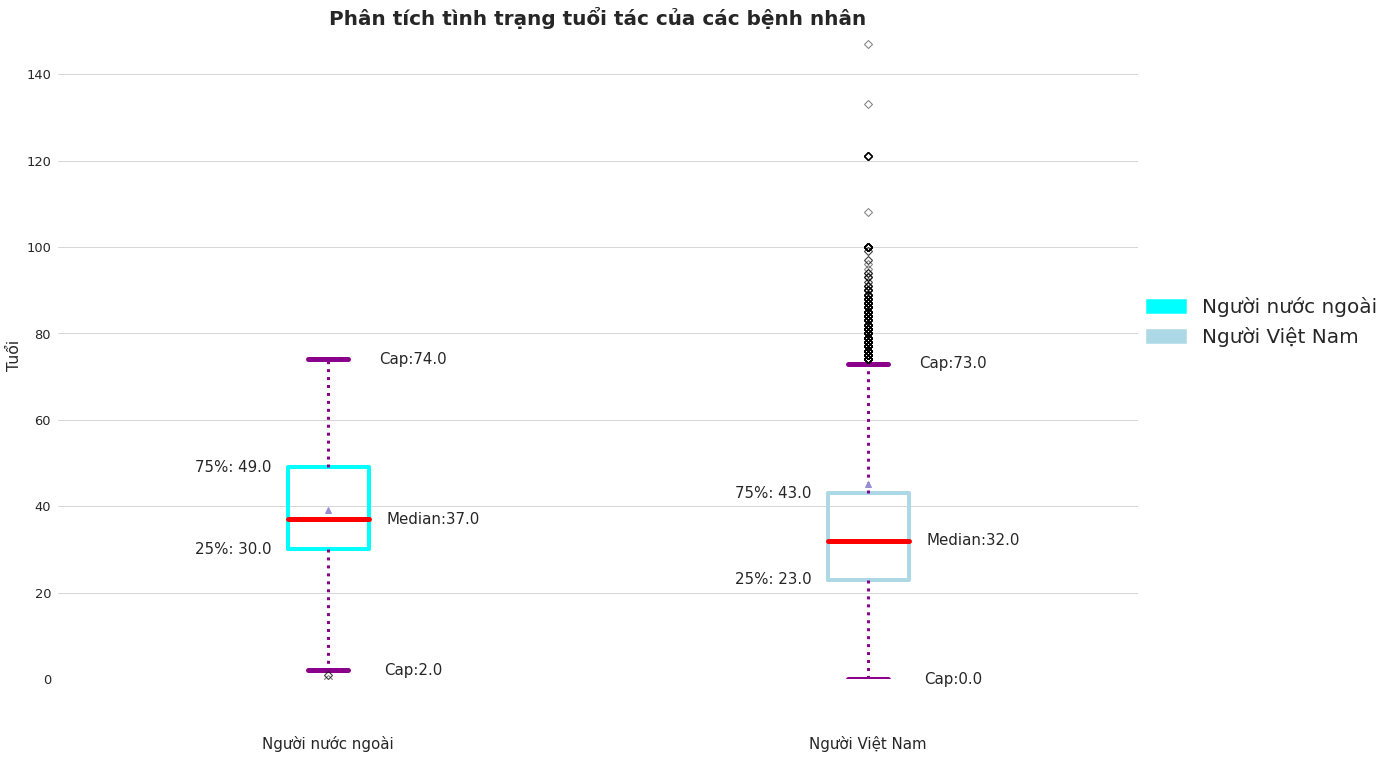

In [30]:
def box_plot():
    # Query data
    foreigner = patient_data_df.query('type == 0')
    vietnamese = patient_data_df.query('type == 1')
    
    data = [foreigner.age,
            vietnamese.age]

    print(foreigner.age.max())

    print(vietnamese.age.max())

    # Update font size
    plt.rcParams.update({'font.size': 13})

    # Init fig
    fig = plt.figure(figsize=(15, 9))

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])

    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Creating plot
    box = plt.boxplot(data, showmeans=True)

    # Coloring
    colors = ['cyan', 'lightblue']
    for patch, color in zip(box['boxes'], colors):
        patch.set(color=color)
        patch.set_linewidth(4)

    ax.text(0.25, -0.1, 'Người nước ngoài', horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes, fontsize=15)
    ax.text(0.75, -0.1, 'Người Việt Nam', horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes, fontsize=15)
    

    plt.title('Phân tích tình trạng tuổi tác của các bệnh nhân', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    plt.ylabel('Tuổi')

    # Modify legend
    foreigner_patch = mpatches.Patch(color='cyan', label='Người nước ngoài')
    vietnamese_patch = mpatches.Patch(color='lightblue', label='Người Việt Nam')
    plt.legend(handles=[foreigner_patch, vietnamese_patch], loc='lower left', bbox_to_anchor= (1., 0.5), ncol=1,
            borderaxespad=0, frameon=False, prop={'size': 20})
  
    # Allow grid
    plt.grid(True)
    plt.ylim([0, 150])


    # changing color and linewidth of
    # whiskers
    for whisker in box['whiskers']:
      whisker.set(color ='#8B008B',
                linewidth = 3,
                linestyle =":")
 
    # changing color and linewidth of
    # caps
    for cap in box['caps']:
      cap.set(color ='#8B008B',
            linewidth = 5)
 
    # changing color and linewidth of
    # medians
    for median in box['medians']:
      median.set(color ='red',
               linewidth = 5)
 
    # changing style of fliers
    for flier in box['fliers']:
        flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
        
    for line in box['medians']:
      # get position data for median line
      x, y = line.get_xydata()[1] # top of median line
      # overlay median value
      plt.text(x + 0.12, y, 'Median:' + '%.1f' % y,
         horizontalalignment='center', fontsize=15,
             bbox={'facecolor': 'white', 'alpha': 1,
                   'edgecolor': 'none', 'pad': 1},
             ha='center', va='center') # draw above, centered
    for line in box['caps']:
      x, y = line.get_xydata()[1]
      # overlay median value
      plt.text(x + 0.12, y, 'Cap:' + '%.1f' % y,
         horizontalalignment='center', fontsize=15,
             bbox={'facecolor': 'white', 'alpha': 1,
                   'edgecolor': 'none', 'pad': 1},
             ha='center', va='center') # draw above, centered

    for line in box['boxes']:
      x, y = line.get_xydata()[0] # bottom of left line
      plt.text(x - 0.1,y, '25%: ' + '%.1f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center', fontsize=15,
             bbox={'facecolor': 'white', 'alpha': 1,
                   'edgecolor': 'none', 'pad': 1},
             ha='center', va='center')      # below
      x, y = line.get_xydata()[3] # bottom of right line
      plt.text(x - 0.1,y, '75%: ' + '%.1f' % y,
         horizontalalignment='center', # centered
             verticalalignment='center', fontsize=15,
             bbox={'facecolor': 'white', 'alpha': 1,
                   'edgecolor': 'none', 'pad': 1},
             ha='center', va='center')      # below
    
    plt.tight_layout()
    plt.xticks([])
    # show plot
    plt.show()
box_plot()

***Phân tích biểu đồ về tình trạng tuổi tác của bệnh nhân***

Trung vị tuổi các bệnh nhân nước ngoài là 37

Trung vị tuổi các bệnh nhân Việt Nam là 32

Dữ liệu có xu hướng khá gần giá trị trung bình

Đối với các bệnh nhân nước ngoài:
Khoảng số phân tử: Q3 - Q1 = 12

Và đối với các bệnh nhân Việt Nam
Khoảng số phân tử: Q3 - Q1 = 19

Cho thấy rằng, khoảng nhiễm bệnh của người Việt Nam là cao, và tập trung trong lứa tuổi từ 24-43, thuộc nhóm tuổi người lao động, những người thường xuyên tiếp xúc trong môi trường lao động, công ty, xí nghiệp, ...

Ở các bệnh nhân Việt Nam, số lượng người bệnh cao hơn 80 tuổi tương đối nhiều, điều này cho thấy rằng COVID-19 tác động lớn với người già.

Ở các bệnh nhân nước ngoài, hầu hết đều dưới 60 tuổi, đây là những thành phần nhập cảnh vào Việt Nam sinh sống và làm việc.

##4.7.Phân tích dữ liệu theo nhóm tuổi của bệnh nhân

In [31]:
'''
def age_chart(df):
    #These are the "Tableau 20" colors as RGB.  
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    #Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
    for i in range(len(tableau20)):
        r, g, b = tableau20[i]
        tableau20[i] = (r / 255., g / 255., b / 255.)

    df = df.sort_values(
        'Group_Age', ascending=False).reset_index(drop=True).set_index('Group_Age')

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 8))
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    # plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax1.spines[s].set_visible(False)
    # Remove x, y Ticks
    ax1.xaxis.set_ticks_position('none')
    ax1.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax1.xaxis.set_tick_params(pad=5)
    ax1.yaxis.set_tick_params(pad=10)

    ax1.text(0.3, 0.5, 'Biểu đồ các trường hợp COVID-19 theo nhóm tuổi', horizontalalignment='center',
             verticalalignment='center', transform=ax1.transAxes, fontsize=15, rotation=90, fontdict={'fontsize': 20, 'fontweight': 'bold'})

    ax1.text(1, 0.08, '0-9', verticalalignment='center', transform=ax1.transAxes, fontsize=15,  bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center'
             )
    ax1.text(1, 0.18, '10-19', verticalalignment='center', transform=ax1.transAxes, fontsize=15,
             bbox={'facecolor': 'white', 'alpha': 1,
                   'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.27, '20-29', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.36, '30-39', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.45, '40-49', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.55, '50-59', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.64, '60-69', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.73, '70-79', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.82, '80-89', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(1, 0.91, '90+', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax1.text(0.9, 1, 'Nhóm tuổi', verticalalignment='center', transform=ax1.transAxes, fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'edgecolor': 'none', 'pad': -1},
             ha='center', va='center')
    ax2.barh(df.index, df['Confirmed_Cases'], align='edge', color=['Red'])
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax2.spines[s].set_visible(False)
    # Remove x, y Ticks
    ax2.xaxis.set_ticks_position('none')
    ax2.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax2.xaxis.set_tick_params(pad=5)
    ax2.yaxis.set_tick_params(pad=10)

    # Add x, y gridlines
    ax2.grid(b=True, color='grey',
             linestyle='-.', linewidth=0.5,
             alpha=0.2)
    # Show top values
    ax2.invert_yaxis()

    # Add annotation to bars
    for i in ax2.patches:
        ax2.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize=10, fontweight='bold',
                 color='grey')
    ax2.text(1.3, -0.05, 'Ca nhiễm COVID-19', horizontalalignment='center',
             verticalalignment='center', transform=ax1.transAxes, fontsize=15)
    # ax2.set_yticks(df.index)
    ax3.barh(df.index, df['Recover_Cases'], align='edge', color=['Green'])
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax3.spines[s].set_visible(False)
    # Remove x, y Ticks
    ax3.xaxis.set_ticks_position('none')
    ax3.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax3.xaxis.set_tick_params(pad=5)
    ax3.yaxis.set_tick_params(pad=10)

    # Add x, y gridlines
    ax3.grid(b=True, color='grey',
             linestyle='-.', linewidth=0.5,
             alpha=0.2)
    # Show top values
    ax3.invert_yaxis()

    # Add annotation to bars
    for i in ax3.patches:
        ax3.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize=10, fontweight='bold',
                 color='grey')
    ax3.text(2.6, -0.05, 'Ca khỏi COVID-19', horizontalalignment='center',
             verticalalignment='center', transform=ax1.transAxes, fontsize=15)

    ax4.barh(df.index, df['Death_Cases'], align='edge', color=['Black'])
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax4.spines[s].set_visible(False)
    # Remove x, y Ticks
    ax4.xaxis.set_ticks_position('none')
    ax4.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax4.xaxis.set_tick_params(pad=5)
    ax4.yaxis.set_tick_params(pad=10)

    # Add x, y gridlines
    ax4.grid(b=True, color='grey',
             linestyle='-.', linewidth=0.5,
             alpha=0.2)
    # Show top values
    ax4.invert_yaxis()

    # Add annotation to bars
    for i in ax4.patches:
        ax4.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize=10, fontweight='bold',
                 color='grey')
    ax4.text(3.9, -0.05, 'Ca tử vong COVID-19', horizontalalignment='center',
             verticalalignment='center', transform=ax1.transAxes, fontsize=15)

    ax5.barh(df.index, df['Other_Cases'], align='edge', color=['Yellow'])
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax5.spines[s].set_visible(False)
    # Remove x, y Ticks
    ax5.xaxis.set_ticks_position('none')
    ax5.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax5.xaxis.set_tick_params(pad=5)
    ax5.yaxis.set_tick_params(pad=10)

    # Add x, y gridlines
    ax5.grid(b=True, color='grey',
             linestyle='-.', linewidth=0.5,
             alpha=0.2)
    # Show top values
    ax5.invert_yaxis()

    # Add annotation to bars
    for i in ax5.patches:
        ax5.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize=10, fontweight='bold',
                 color='grey')
    ax5.text(5.1, -0.05, 'Trường hợp khác', horizontalalignment='center',
             verticalalignment='center', transform=ax1.transAxes, fontsize=15)

    # Modify legend
    active_patch = mpatches.Patch(color='red', label='Ca nhiễm COVID-19')
    release_patch = mpatches.Patch(color='green', label='Ca khỏi COVID-19')
    death_patch = mpatches.Patch(color='black', label='Ca tử vong COVID-19')
    other_patch = mpatches.Patch(color='yellow', label='Trường hợp khác')
    plt.legend(handles=[active_patch, release_patch, death_patch, other_patch], loc='lower left', bbox_to_anchor=(1.5, 0.3), ncol=1,
               borderaxespad=0, frameon=False, prop={'size': 20})

    # Show
    plt.show()


age_chart(df=df_merged)
'''

'\ndef age_chart(df):\n    #These are the "Tableau 20" colors as RGB.  \n    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),\n                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),\n                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),\n                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),\n                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]\n    #Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.\n    for i in range(len(tableau20)):\n        r, g, b = tableau20[i]\n        tableau20[i] = (r / 255., g / 255., b / 255.)\n\n    df = df.sort_values(\n        \'Group_Age\', ascending=False).reset_index(drop=True).set_index(\'Group_Age\')\n\n    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 8))\n    ax1.axis(\'off\')\n    ax2.axis(\'off\')\n    ax3.axis(\'off\')\n    ax4.axis(\'off\')\n    ax5.ax

In [32]:
df_merged.sort_values('Group_Age', ascending=False)

,Group_Age,Confirmed_Cases,Recover_Cases,Death_Cases,Other_Cases
8,90+,223,8,4.0,0.0
9,80-89,120,33,18.0,0.0
7,70-79,307,94,16.0,0.0
6,60-69,1043,312,39.0,2.0
3,50-59,2018,590,16.0,2.0
2,40-49,3223,959,3.0,0.0
1,30-39,5311,2433,7.0,0.0
0,20-29,5405,2824,2.0,0.0
4,10-19,2007,618,0.0,0.0
5,0-9,1342,427,0.0,0.0


In [33]:
Top = 10

fig_age_confirmed = px.bar(df_merged.sort_values('Group_Age', ascending=True), x = 'Confirmed_Cases', y = 'Group_Age', text = 'Confirmed_Cases',orientation='h',color='Confirmed_Cases')
fig_age_recovered = px.bar(df_merged.sort_values('Group_Age', ascending=True), x = 'Recover_Cases', y = 'Group_Age', text = 'Recover_Cases',orientation='h',color='Recover_Cases')
fig_age_deaths = px.bar(df_merged.sort_values('Group_Age', ascending=True), x = 'Death_Cases', y = 'Group_Age', text = 'Death_Cases',orientation='h',color='Death_Cases')


fig = make_subplots(rows = 1, 
                    cols = 3, 
                    shared_xaxes = False, 
                    horizontal_spacing=0.14, 
                    vertical_spacing=.1, 
                    x_title='Số ca',
                    y_title='Nhóm tuổi',
                    subplot_titles = ('Số ca mắc', 'Số ca hồi phục', 'Số ca tử vong'))

fig.add_trace(fig_age_confirmed['data'][0], row = 1, col = 1)
fig.add_trace(fig_age_recovered['data'][0], row = 1, col = 2)
fig.add_trace(fig_age_deaths['data'][0], row = 1, col = 3)
fig.update_layout(
    title={
        'text': "Các trường hợp covid19 theo nhóm tuổi",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    height = 500)
fig.show()

***Phân tích các tình tình hình dịch thông qua trạng thái vào nhóm tuổi***

Từ biểu đồ thể hiện độ tuổi của các ca nhiễm covid 19 ta có thể thấy được:
* Thứ nhất những ca mắc bệnh (cụ thể trong dợt dịch thứ 4 này), đa số ở độ tuổi 20-29 ( Sinh viên, công nhân viên chức người lao động), 30-49 và 50-59 là những độ tuổi lao động => Từ đây có thể suy ra được, dịch đang lây lan qua cộng đồng cụ thể là những người trong đội tuổi lao động => Đi làm nhiều, tiếp xúc nhiều => Việc các chùm bệnh có quy mô lớn xuất hiện => Giải pháp đề ra, hạn chế tiếp xúc với đồng nghiệp, thực hiện nghiêm 5K nơi làm việc cũng như nơi công cộng để giữ an toàn cho gia đình, bản thân, xã hội. 
* Thứ 2 những độ tuổi khác là những đội tuổi bị lây nhiễm thụ động, tức có nghĩa là do cha, mẹ, con cái mang dịch về nhà => Số lượng gộp lại khá cao, tuy nhiên không có giải pháp đề xuất nào cho đối tượng trên ngoài thực hiện nghiêm 5K và hạn chế tiếp xúc với người ngoài => tự giãn cách (để không trở thành nguồn lây cho gia đình)

Từ biểu đồ thể hiện độ tuổi của các ca tử vong và ca phục hồi covid-19, ta có những nhận xét sau:
* Tuy độ tuổi lao động là độ tuổi dễ mắc bệnh nhất nhưng cũng là độ tuổi có số lượng trương hợp phục hồi cao nhất và tỉ lệ tử vong thấp nhất.
* Đối tượng là người cao tuổi có tỉ lệ phục hồi thấp nhất và tỉ lệ tử vong cao nhất => đa số các trương hợp tử vong đều đi kèm với các bệnh nền nguy hiểm, việc mắc phải virus làm cơ thể sản sinh sức đề kháng khó khăn (do độ tuổi) => dẫn đến tử vong

###4.8 Top 10 những tỉnh thành có chỉ số cao nhất 


In [34]:

Top = 10

fig_confirmed = px.bar(df_province_merged.sort_values('Confirmed_Cases').tail(Top), x = 'Confirmed_Cases', y = 'Province', text = 'Confirmed_Cases',orientation='h',color='Confirmed_Cases')
fig_recovered = px.bar(df_province_merged.sort_values('Recover_Cases').tail(Top), x = 'Recover_Cases', y = 'Province', text = 'Recover_Cases',orientation='h',color='Recover_Cases')
fig_deaths = px.bar(df_province_merged.sort_values('Death_Cases').tail(Top), x = 'Death_Cases', y = 'Province', text = 'Death_Cases',orientation='h',color='Death_Cases')


fig = make_subplots(rows = 1, cols = 3, shared_xaxes = False, horizontal_spacing=0.14, vertical_spacing=.1, subplot_titles = ('Confirmed_Cases', 'Recovered_Cases', 'Death_Cases'))

fig.add_trace(fig_confirmed['data'][0], row = 1, col = 1)
fig.add_trace(fig_recovered['data'][0], row = 1, col = 2)
fig.add_trace(fig_deaths['data'][0], row = 1, col = 3)
fig.update_layout(
    title={
        'text': "Top 10 tỉnh thành dẫn đầu các chỉ số",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    height = 500)
fig.show()

Phần dự đoán và trực quan say đây sẽ chỉ áp dụng cho đợt dịch thứ 4 từ 6/5/2021 - 12/7/2021. Dự đoán nhằm mục đích làm cho quốc gia và công dân nhận thức được các mối đe dọa / hậu quả có thể xảy ra. 

#5. Phân tích trực quan tình hình dịch đợt 4

###5.1 Tổng số ca theo ngày của đợt dịch 4

In [35]:
covid19_4th = covid19_df.loc['20210506':'20210712']
covid19_4th['Date'] = covid19_4th.index
covid19_4th['Confirmed_Case_Daily'] = covid19_4th['Confirmed_Cases'] - covid19_4th['Death_Cases']- covid19_4th['Recover_Cases']
covid19_df['Date'] = covid19_df.index

In [36]:
fig = px.bar(covid19_4th, x = "Date", y = "Confirmed_Case_Daily", color = 'Confirmed_Case_Daily',color_continuous_scale='plotly3',orientation ='v', title="Số lương ca bệnh mỗi ngày của đợt dịch 4",color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

###5.2 Số ca mắc mới mỗi ngày ở đợt dịch thứ 4 này


In [37]:
fig = px.bar(covid19_4th, x = "Date", y = "New_Confirmed_Daily", color = 'New_Confirmed_Daily', orientation ='v', title="Số lượng ca bệnh mới hàng ngày của đợt dịch thứ 4",color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

#5.3 Biểu đồ Phân bố dịch bệnh ở các tỉnh thành

In [38]:

fig = px.pie(df_province_merged[:10], values='Confirmed_Cases', names='Province', title='Phân bố các trường hợp nhiễm bệnh ở các tỉnh thành')
fig.update_layout(width=800, height=600)
fig.show()

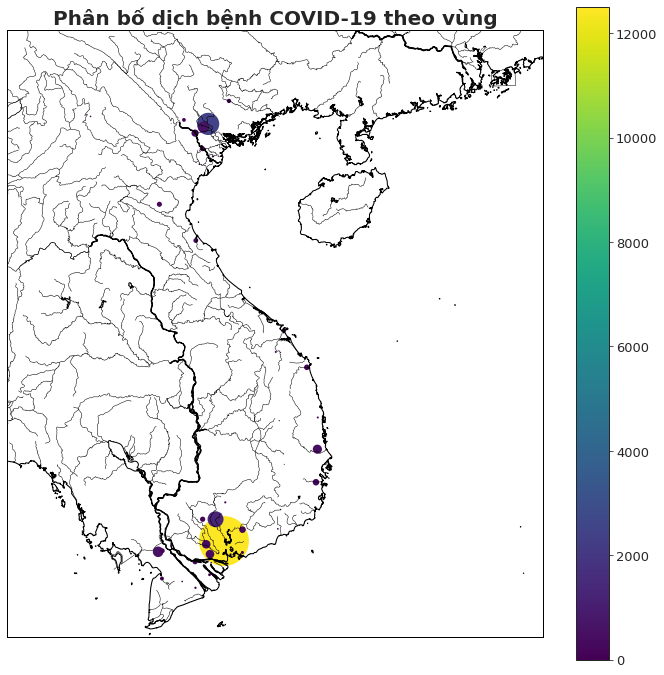

In [39]:
#initiate the figure with it's size
fig = plt.figure(figsize = (12, 12))

#initialize the Basemap with appropriate arguments. These will be discussed later.
m = Basemap(projection = 'lcc', resolution='f', lat_0 = 16, lon_0 = 108,width=1.5E6, height=1.7E6)
m.bluemarble()
m.drawmapboundary()
m.drawrivers()
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Scatter plot with latitude and longitude values customizing color with median_house_value and median_income
m.scatter(df_province_merged_position.Long.values, 
		  df_province_merged_position.Lat.values,
		  latlon = True,
		  c = df_province_merged_position.Confirmed_Cases.tolist(),
		  s = (np.array(df_province_merged_position.Confirmed_Cases.astype(int))/5),
		  cmap = 'viridis',
		  edgecolors = 'none')

#put a colorbar
plt.colorbar()
plt.title('Phân bố dịch bệnh COVID-19 theo vùng', fontdict={'fontsize': 20, 'fontweight': 'bold'})
#save and show
plt.savefig('matplotlib_plot.png')
plt.show()

#5.4 Tổng quát tình hình dịch bệnh và số ca mắc


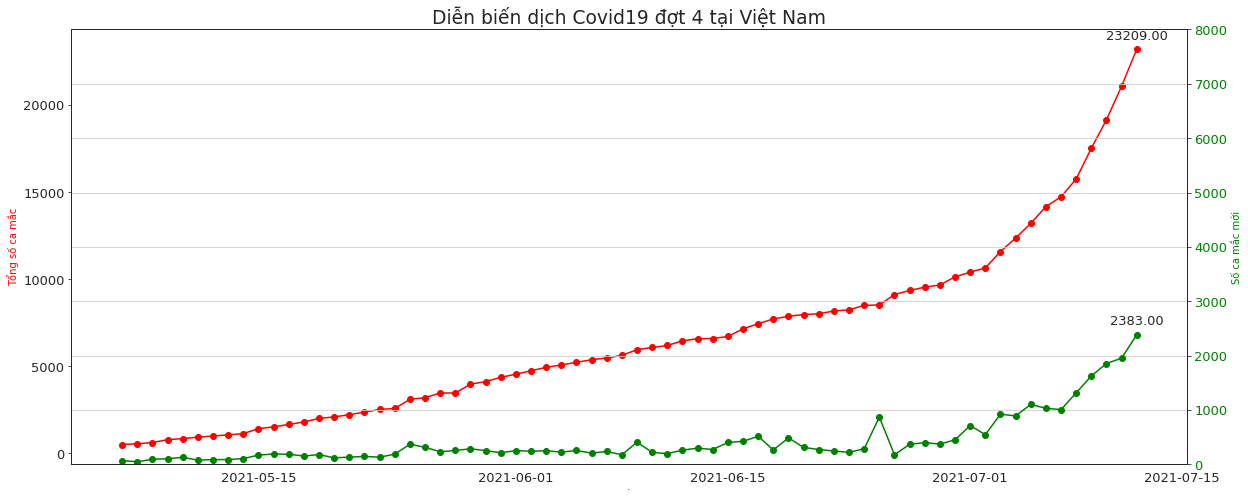

In [40]:
fig,ax1 = plt.subplots(1,1, figsize=(20,8))

ax1.plot(covid19_4th['Date'],covid19_4th['Confirmed_Case_Daily'], marker='o', color = 'red')
ax2 = ax1.twinx()
ax2.plot(covid19_4th['Date'],covid19_4th['New_Confirmed_Daily'],  marker='o', color = 'green')
ax1.set_xlabel('Ngày', fontsize=1)

ax1.set_ylabel('Tổng số ca mắc', color = 'red', fontsize=10)
ax2.set_ylabel('Số ca mắc mới', color = 'green', fontsize=10)
ax2.tick_params(axis='y', labelcolor='green')
label = "{:.2f}".format(covid19_4th['Confirmed_Case_Daily'][-1])
ax1.annotate(label,
            (covid19_4th['Date'][-1],covid19_4th['Confirmed_Case_Daily'][-1]),
            textcoords="offset points", 
            xytext=(0,10), 
            ha='center') 

label = "{:.2f}".format(covid19_4th['New_Confirmed_Daily'][-1])
ax2.annotate(label,
            (covid19_4th['Date'][-1],covid19_4th['New_Confirmed_Daily'][-1]), 
            textcoords="offset points", 
            xytext=(0,10), 
            ha='center') 

ax2.set_ylim([0,8000])
#plt.xticks(covid19_4th['Date'], rotation='vertical')

plt.title("Diễn biến dịch Covid19 đợt 4 tại Việt Nam")
plt.grid()
plt.show()

#5. Dự đoán xu hướng và tăng trưởng COVID-19

Prophet là một thủ tục để dự báo dữ liệu chuỗi thời gian dựa trên mô hình phụ gia trong đó các xu hướng phi tuyến tính phù hợp với thời vụ hàng năm, hàng tuần và hàng ngày, cộng với các hiệu ứng ngày lễ. Nó hoạt động tốt nhất với chuỗi thời gian có hiệu ứng theo mùa mạnh mẽ và một số mùa dữ liệu lịch sử. Prophet rất chắc chắn khi thiếu dữ liệu và thay đổi trong xu hướng, và thường xử lý tốt các ngoại lệ.

Prophet là phần mềm mã nguồn mở do nhóm Khoa học Dữ liệu cốt lõi của Facebook phát hành .

In [41]:
from fbprophet import Prophet

Đầu vào là date và một cột số lượng, trong trường hợp này ta chọn Tổng số lượng người bị nhiễm bệnh

###6.1 Dự báo số lượng các ca mắc mới trong 7 ngày tiếp theo

In [42]:
covid19_df['Date'] = covid19_df.index
Date_New_Confirmed = covid19_4th[["Date","New_Confirmed_Daily"]]
Date_New_Confirmed.reset_index(drop=True, inplace=True)
Date_New_Confirmed.rename(columns={'Date': 'ds', 'New_Confirmed_Daily': 'y'}, inplace=True)
Date_New_Confirmed.tail()


,ds,y
63,2021-07-08,1314
64,2021-07-09,1625
65,2021-07-10,1853
66,2021-07-11,1953
67,2021-07-12,2383


In [43]:
model_for_forecast_Num_Of_Daily_NewCase = Prophet(interval_width = 1)
model_for_forecast_Num_Of_Daily_NewCase.fit(Date_New_Confirmed)

future = model_for_forecast_Num_Of_Daily_NewCase.make_future_dataframe(periods=7)

forecast = model_for_forecast_Num_Of_Daily_NewCase.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']][-8:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
67,2021-07-12,1506.198454,919.594345,2155.948812
68,2021-07-13,1453.037265,696.092000,2016.920228
69,2021-07-14,1511.857957,904.760326,2176.563387
70,2021-07-15,1592.289185,984.698275,2232.880072
71,2021-07-16,1670.511112,1021.809874,2334.565553
72,2021-07-17,1740.933032,1092.868311,2365.095744
73,2021-07-18,1778.552690,1177.413653,2328.588615
74,2021-07-19,1878.465785,1212.845137,2614.194636


***Phân tích các số liệu được dự báo cho số lượng ca mắc vào 7 ngày tiếp theo***
Nhóm chúng em đã sử dụng Prophet API của fb để dự đoán dựa trên chuỗi thời gian và giá trị tương ứng của nó. Cụ thể trong trường hợp này vào ngày 13/07/2021 mô hình đã dự đoán tỉ lệ các số các bệnh mới sẽ dao động từ 797 - 2090 ca. Và theo thực tế nhóm quan sát được là 852 ca mắc trong ngày. 
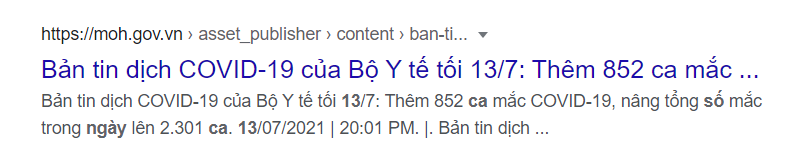


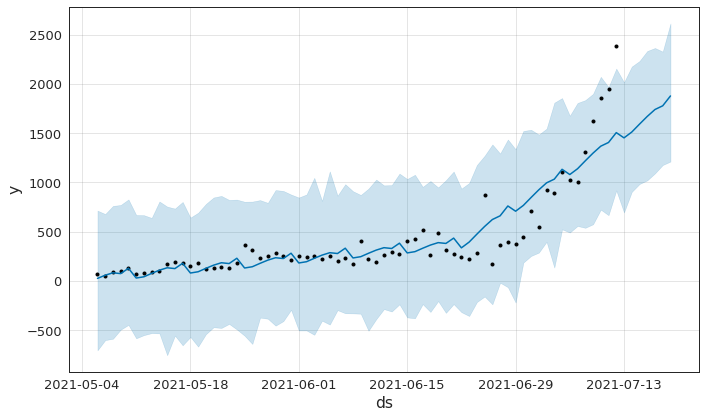

In [44]:
Date_Confirmed_plot = model_for_forecast_Num_Of_Daily_NewCase.plot(forecast)

Hình ảnh trên cho thấy dự đoán cơ bản. Màu xanh lam nhạt là mức độ không chắc chắn ( yhat_upper và yhat_lower ), màu xanh lam đậm là dự đoán ( yhat ) và các chấm đen là dữ liệu gốc. Qua quan sát ta có thể thấy được đường dự đoán rất gần với số liệu thực tế.Từ đó đưa ra được các biể đồ thành phần về xu hướng dịch và tính thời vụ của dịch trong tuần

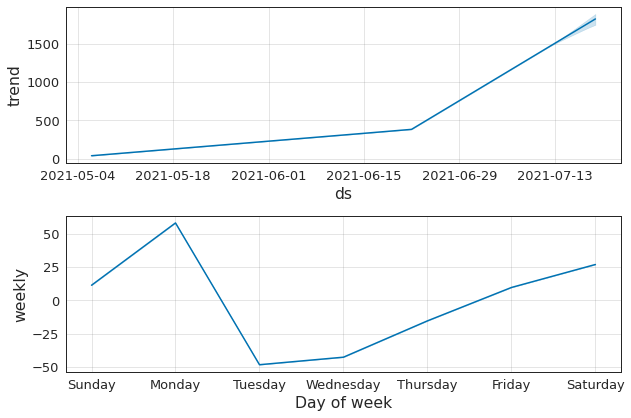

In [45]:
confirmed_forecast_plot = model_for_forecast_Num_Of_Daily_NewCase.plot_components(forecast)

Các hình ảnh phía trên cho thấy xu hướng và tính thời vụ (trong một tuần) của dữ liệu chuỗi thời gian. Chúng ta có thể thấy xu hướng ngày càng tăng, có nghĩa là số lượng các ca nhiễm covid19 tăng lên theo thời gian. Nếu nhìn vào biểu đồ xu hướng, chúng ta có thể thấy rằng tháng 6 và tháng 7 là thời điểm dịch bệnh đang bùng phát dữ dội và chưa có dấu hiệu thuyên giảm (dựa vào các biểu đồ dự đoán mà ban chỉ đạo phòng chống dịch bệnh có thể có những chính sách phù hợp). Không chỉ vậy, ta còn có thể dựa vào bảng thời vụ để thấy được số lượng ca bệnh có xu hướng tăng rất mạnh vào đầu tuần và giảm mạnh ở những ngày giữa tuần (từ biểu đồ này có thể cung cấp cho các bác sĩ hoặc ban chỉ đạo những thông tin để có thể chuẩn bị ứng phó kịp thời).


###6.2 Dự báo số lượng các ca tử vong trong 7 ngày tiếp theo

In [46]:
Date_Death = covid19_4th[["Date","Death_Cases"]]
Date_Death.reset_index(drop=True, inplace=True)
Date_Death.rename(columns={'Date': 'ds', 'Death_Cases': 'y'}, inplace=True)
Date_Death.tail()

,ds,y
63,2021-07-08,104
64,2021-07-09,110
65,2021-07-10,112
66,2021-07-11,119
67,2021-07-12,125


In [47]:

model_for_forecast_Num_Of_DeathCases = Prophet(interval_width = 1) 
model_for_forecast_Num_Of_DeathCases.fit(Date_Death)

future = model_for_forecast_Num_Of_DeathCases.make_future_dataframe(periods=7)

forecast = model_for_forecast_Num_Of_DeathCases.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']][-8:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
67,2021-07-12,117.585314,111.552997,125.034153
68,2021-07-13,120.049745,113.688047,126.694994
69,2021-07-14,122.753778,116.278052,129.821694
70,2021-07-15,125.518330,119.620406,132.594993
71,2021-07-16,129.196564,122.552679,135.646857
72,2021-07-17,131.874710,122.896207,139.557690
73,2021-07-18,135.252712,126.938087,143.312512
74,2021-07-19,138.630637,131.470480,147.644823


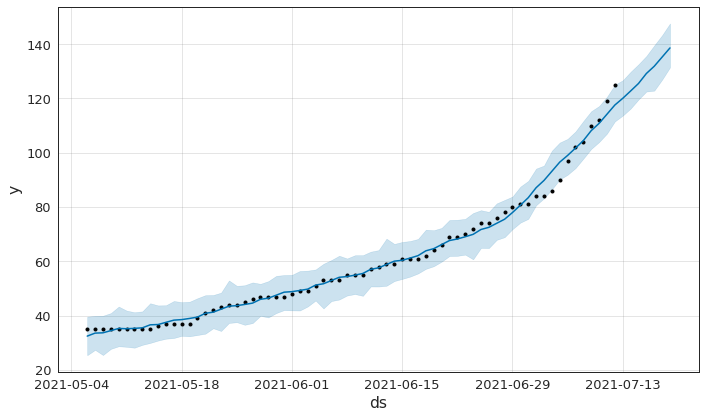

In [48]:
Date_Death_plot = model_for_forecast_Num_Of_DeathCases.plot(forecast)

Hình ảnh trên cho thấy dự đoán cơ bản. Màu xanh lam nhạt là mức độ không chắc chắn (yhat_upper và yhat_lower), màu xanh lam đậm là dự đoán (yhat) và các chấm đen là dữ liệu gốc. Qua quan sát ta có thể thấy được đường dự đoán rất sát với số liệu thực tế.Từ đó đưa ra được các biểu đồ thành phần về xu hướng dịch và tính thời vụ của dịch trong tuần. Không chỉ vậy sự khác biệt của các ca tử vong theo ngày không cao, làm cho dữ liệu này tuyến tính.

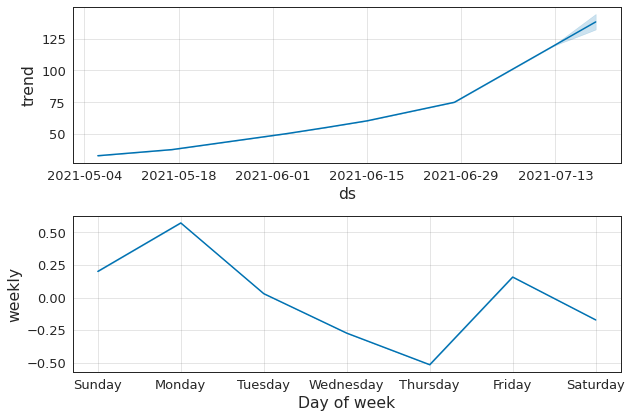

In [49]:
confirmed_death_plot = model_for_forecast_Num_Of_DeathCases.plot_components(forecast)

Chúng ta có thể thấy xu hướng ngày càng tăng, có nghĩa là số lượng các ca tử vong do covid19 tăng lên theo thời gian tiếp theo. Nếu nhìn vào biểu đồ xu hướng, chúng ta có thể thấy rằng tháng 6 và tháng 7 là thời điểm dịch bệnh đang bùng phát dữ dội và dự báo số ca tử vong sẽ tăng lên => từ dự báo này có thể chúng ta sẽ đón nhận các biến chủng phức tạp khác hoặc do tình hình bệnh lan rộng dẫn tới mất kiểm soát khiến số ca tử vong tăng cao hoặc nhiều giả thuyết khác được đặt ra.... ( dựa vào các biểu đồ dự đoán mà ban chỉ đạo phòng chống dịch bệnh có thể có những chính sách phù hợp). Không chỉ vậy, ta còn có thể dựa vào bảng thời vụ để thấy được số lượng ca bệnh có xu hướng tăng rất mạnh vào đầu tuần và giảm mạnh ở thứ 5 hàng tuần.


###6.3 Dự báo số lượng các ca hồi phục trong 7 ngày tiếp theo

In [50]:
Date_Recover = covid19_4th[["Date","Recover_Cases"]]
Date_Recover.reset_index(drop=True, inplace=True)
Date_Recover.rename(columns={'Date': 'ds', 'Recover_Cases': 'y'}, inplace=True)


In [51]:
model_for_forecast_Num_Of_RecoverCases = Prophet(interval_width = 1) 
model_for_forecast_Num_Of_RecoverCases.fit(Date_Recover)

future = model_for_forecast_Num_Of_RecoverCases.make_future_dataframe(periods=7)

forecast = model_for_forecast_Num_Of_RecoverCases.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']][-8:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
67,2021-07-12,9532.532730,9315.802784,9721.561505
68,2021-07-13,9751.975948,9534.749485,9976.102075
69,2021-07-14,9969.686767,9735.832947,10199.640132
70,2021-07-15,10194.151013,9966.066889,10431.103223
71,2021-07-16,10384.514978,10155.307419,10610.650081
72,2021-07-17,10609.220024,10372.799945,10901.512644
73,2021-07-18,10802.985295,10439.220765,11123.481650
74,2021-07-19,11027.756737,10680.538991,11356.920374


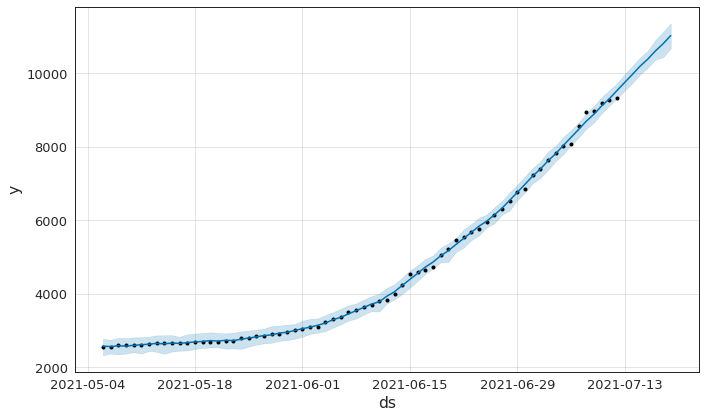

In [52]:
Date_Recover_plot = model_for_forecast_Num_Of_RecoverCases.plot(forecast)

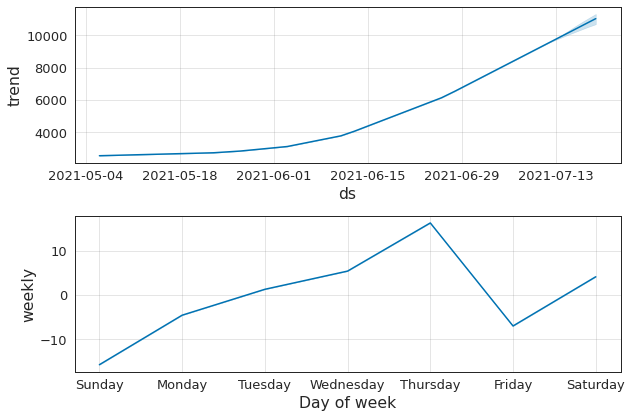

In [53]:
confirmed_recover_plot = model_for_forecast_Num_Of_RecoverCases.plot_components(forecast)

#7. TÀI LIỆU THAM KHẢO
1. https://facebook.github.io/prophet/docs/quick_start.html 